In [50]:
#LogisticRegression

In [51]:
import numpy as np
import pandas as pd
from sklearn import metrics

#Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

In [52]:
train = np.load ('train.npy')
test = np.load ('test.npy')

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
modelo = LogisticRegression(solver='liblinear') #solver='liblinear' quita el error AttributeError: 'str' object has no attribute 'decode'

In [55]:
#x_train = list()
y_train = list()
x_test = list()
y_test = list()
y_prds = list()
y_prds2 = list()
y_test2 = list()
media = 0

#Entrenamos el modelo
for i in range(len(train)): #10
    x_train = list()
    y_train = list()
    
    print("Particion ", i + 1)

    y_train = np.array(["carton"]*int(train[i].shape[0]/3) 
                    +  ["plastico"]*int(train[i].shape[0]/3) 
                    +  ["cristal"]*int(train[i].shape[0]/3))
    
    for j in range(len(train[i])):
        x_train.append(train[i][j])
        

    modelo.fit(x_train,y_train)
    print((y_train == modelo.predict(x_train)).mean())
    media = media + (y_train == modelo.predict(x_train)).mean()

Particion  1
0.8592592592592593
Particion  2
0.8444444444444444
Particion  3
0.837037037037037
Particion  4
0.8111111111111111
Particion  5
0.8592592592592593
Particion  6
0.8222222222222222
Particion  7
0.8481481481481481
Particion  8
0.8666666666666667
Particion  9
0.8222222222222222
Particion  10
0.8333333333333334


In [42]:
#Testamos el modelo
y_test2 = list()
y_prds2 = list()
media = 0

for i in range(len(test)):
    
    x_test = list()
    y_test = list()
    
    
    print("Partición ", i + 1)
    y_test = np.array(["carton"]*int(test[i].shape[0]/3) 
                        +  ["plastico"]*int(test[i].shape[0]/3) 
                        +  ["cristal"]*int(test[i].shape[0]/3))
    for j in range(len(test[i])):#30
        x_test.append(test[i][j])
    
    y_test2.extend(y_test)
    
    y_prds = modelo.predict(x_test)
    y_prds2.extend(y_prds)
    #print(len(y_test2),len(y_prds2))
    score = metrics.accuracy_score(y_test, y_prds)
    #print('Precisión:',score)
    media += score

print("Precisión del modelo: {0: 0.4f}".format(media/len(test)))

Partición  1
Partición  2
Partición  3
Partición  4
Partición  5
Partición  6
Partición  7
Partición  8
Partición  9
Partición  10
Precisión del modelo:  0.7900


In [43]:
comp = pd.DataFrame({'real' : y_test2 , 'preds' : y_prds2 })
comp

,real,preds
0,carton,carton
1,carton,plastico
2,carton,carton
3,carton,carton
4,carton,carton
...,...,...
295,cristal,carton
296,cristal,carton
297,cristal,carton
298,cristal,carton


In [44]:
#Precision de la predicción
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test2, y_prds2)
print("Precisión:", accuracy)

Precisión: 0.79


In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
cm = confusion_matrix(y_test2, y_prds2)
cm #[carton, cristal, plastico]

array([[70,  8, 22],
       [13, 75, 12],
       [ 6,  2, 92]], dtype=int64)

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools  

In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks([-0.5,0,1,2,2.5], ["","carton","cristal","plastico"])

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalizar matriz de confusion")
    else:
        print('Matriz de confusion')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Matriz de confusion
[[70  8 22]
 [13 75 12]
 [ 6  2 92]]


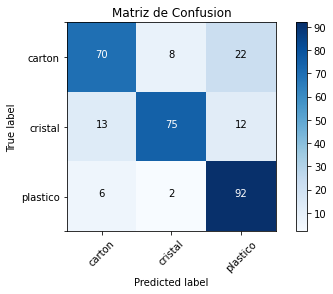

In [49]:
# Plot non-normalized confusion matrix
plt.figure() #num=None, figsize=(8, 6), dpi=80
plot_confusion_matrix(cm, classes= ["carton","cristal","plastico"], title='Matriz de Confusion')